In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()


['measurement', 'station']

In [7]:
# View all of the classes that automap found
inspector = inspect(engine)

# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
M_Columns = inspector.get_columns('Measurement')
for column in M_Columns:
        print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
S_Columns = inspector.get_columns('Station')
for column in S_Columns:
        print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Find the most recent date in the data set.
Recent_Date = Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Recent_Date

('2017-08-23')

In [13]:
# Checking total number of dates
Session.query(func.count(Measurement.date)).all()

[(19550)]

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year

# Perform a query to retrieve the date and precipitation scores
Precipitation = Session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year).all()
print(Precipitation)


[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Pandas_DB = pd.DataFrame(Precipitation)
Pandas_Date = Pandas_DB.set_index("date")

In [16]:
# Sort the dataframe by date
Pandas_Date.sort_values("date")

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


Text(0, 0.5, 'Precipitation')

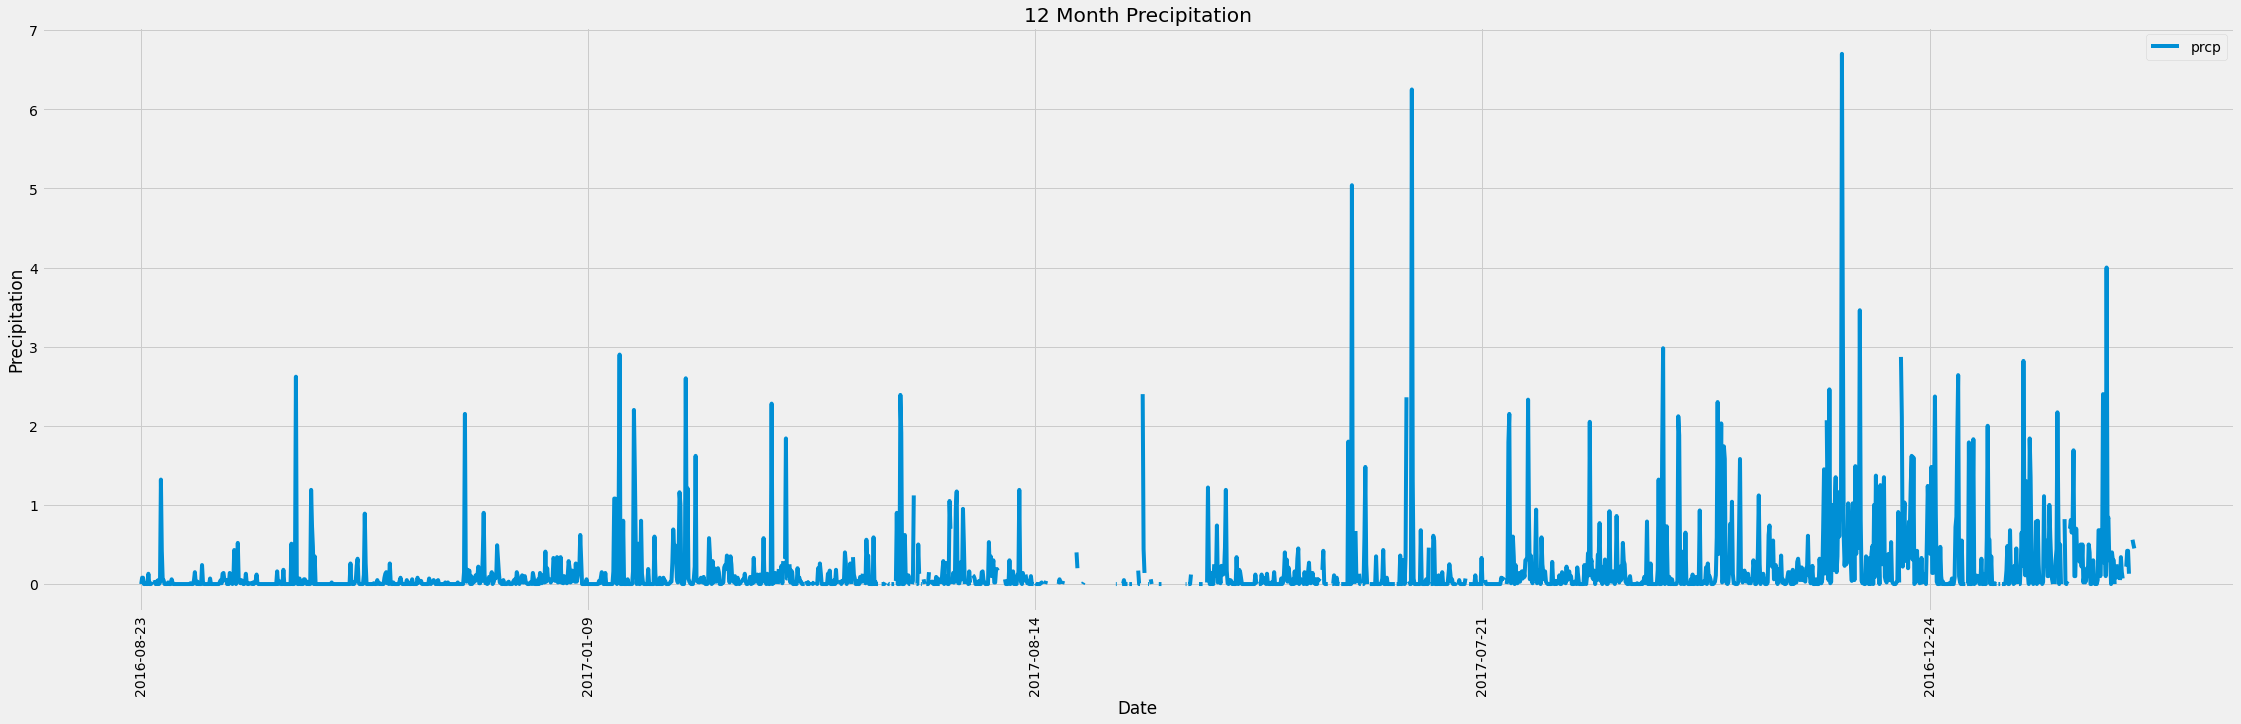

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
Pandas_DB.plot(x = 'date', y='prcp', rot=90, figsize= (35,10))
plt.title ("12 Month Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation")

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Pandas_DB.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
S_Columns = inspector.get_columns('Station')
for column in S_Columns:
        print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [20]:
M_Columns = inspector.get_columns('Measurement')
for column in M_Columns:
        print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [21]:
# Design a query to calculate the total number stations in the dataset
Session.query(func.count(Station.station)).all()

[(9)]

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

#session.query(Table.column, func.count(Table.column)).group_by(Table.column).all()
#Recent_Date = Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Active_Stations = Session.query(Measurement.station, func.count(Measurement.station))\
                .group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
for station in Active_Stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

Lowest = Session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

Highest = Session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

Average = Session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

print(f"For station USC00519281, the lowest temp is {Lowest}, the highest temp is {Highest}, and the average temp is {Average}.")

For station USC00519281, the lowest temp is [(54.0,)] F, the highest temp is [(85.0,)], and the average temp is [(71.66378066378067,)].


In [68]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

Year_Temp = Session.query(Measurement.tobs, Measurement.date).filter(Measurement.date >= one_year)\
    .filter(Measurement.station =="USC00519281")\
    .order_by(Measurement.tobs).all()

print(Year_Temp)

[(59.0, '2017-02-02'), (59.0, '2017-02-08'), (59.0, '2017-02-09'), (60.0, '2017-02-03'), (60.0, '2017-04-30'), (61.0, '2017-02-25'), (62.0, '2016-12-15'), (62.0, '2017-01-06'), (62.0, '2017-01-09'), (62.0, '2017-01-10'), (62.0, '2017-02-10'), (62.0, '2017-03-07'), (63.0, '2016-11-07'), (63.0, '2017-01-04'), (63.0, '2017-01-05'), (63.0, '2017-01-11'), (64.0, '2017-01-03'), (64.0, '2017-02-07'), (64.0, '2017-03-08'), (65.0, '2016-12-13'), (65.0, '2017-01-12'), (65.0, '2017-01-28'), (65.0, '2017-02-16'), (65.0, '2017-02-27'), (65.0, '2017-03-18'), (65.0, '2017-05-01'), (66.0, '2016-12-12'), (66.0, '2017-01-27'), (66.0, '2017-03-10'), (66.0, '2017-03-13'), (66.0, '2017-03-16'), (67.0, '2016-11-10'), (67.0, '2016-12-05'), (67.0, '2016-12-06'), (67.0, '2016-12-31'), (67.0, '2017-02-26'), (67.0, '2017-03-06'), (67.0, '2017-03-09'), (67.0, '2017-03-14'), (67.0, '2017-04-04'), (67.0, '2017-04-06'), (67.0, '2017-04-10'), (67.0, '2017-04-17'), (67.0, '2017-04-19'), (67.0, '2017-04-28'), (67.0, '2

In [69]:
Temp_DB = pd.DataFrame(Year_Temp)
Temp_DB

,tobs,date
0,59.0,2017-02-02
1,59.0,2017-02-08
2,59.0,2017-02-09
3,60.0,2017-02-03
4,60.0,2017-04-30
...,...,...
347,81.0,2017-07-30
348,82.0,2017-07-23
349,82.0,2017-07-29
350,82.0,2017-08-05


In [73]:
Temp_DB_Sorted = Temp_DB.set_index("date")
Temp_DB_Sorted = Temp_DB_Sorted.sort_index(ascending=True)

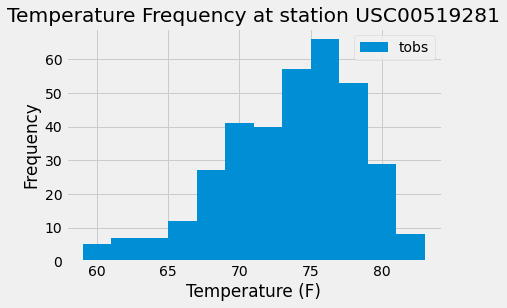

In [93]:
Histogram = Temp_DB_Sorted.plot(kind="hist", bins=12)
Histogram.set_title("Temperature Frequency at station USC00519281")
Histogram.set_xlabel("Temperature (F)")
Histogram.set_ylabel("Frequency")

# Close session

In [91]:
# Close Session
Session.close()